In [ ]:
# MIT License
#
# @title Copyright (c) 2025 Mauricio Tec { display-mode: "form" }

# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.


# Welcome to the HDSI Winter Workshop on LLMs as Autonomous Agents


<img src="https://drive.google.com/uc?export=view&id=1q4SGPmn6sWQhskt4D-1D09q_6C9FDz_L" alt="drawing" width="400"/>


# **Part I: Introduction to Agentic Frameworks**

<a target="_blank" href="https://colab.research.google.com/github/mauriciogtec/hdsi-winter-workshop/blob/main/llm-agents-part1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Expected completion time: 1 hour


## March 7, 2025  <br> Mauricio Tec



**TL;DR** This interactive tutorial introduces the key conceptual framework of LLM agentic systems and provides hands-on experience with techniques such as Chain of Thought and ReAct. Through multiple examples, it demonstrates both the use of the full-featured `smolagents` agentic library and implementing agents from scratch using basic LLM completion functionality.

<img src="https://drive.google.com/uc?export=view&id=1Agfj2lsK155vzmvG6vB4dScH7RqUWV9B" alt="drawing" width="400"/>

<!-- <img src="https://drive.google.com/uc?export=view&id=11o2zAv2_Cu8BL-FVdoRY8z5IEruO3ElZ" alt="drawing" width="400"/> -->

<!-- https://drive.google.com/file/d/11o2zAv2_Cu8BL-FVdoRY8z5IEruO3ElZ/view?usp=sharing -->


See also:

* [Next (Part II): Grounding Agents with Fine-tuning and RL](https://colab.research.google.com/github/mauriciogtec/hdsi-winter-workshop/blob/main/llm-agents-part2.ipynb)
* [Previous (Pre-assignment): Setup LLM Access & API Keys](https://colab.research.google.com/github/mauriciogtec/hdsi-winter-workshop/blob/main/pre-assignment.ipynb)



## Getting Started: Software Prerequisites & Setup


### Utility Function: Markdown Printing

Before proceeding, we will define a very simple utility function to print nicely in a colab notebook environment with Markdown. This is not really needed, but it will make visualizations easier and nicer.


In [1]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

test = "`This is code`. *This is italics*. **This is bold**."
printmd(test)

`This is code`. *This is italics*. **This is bold**.

### Package Requirements


We will be using the recent `smolagents` library for demonstrating advanced LLM agentic usage. `smolagents` was released only a few months ago by `HuggingFace`. It is designed to be extremely lightweight, yet powerful.

ℹ️ Our goal is not only to use it, but to understand its underpinnings. We will do so by coding our own version of its functionality from scratch using only LLM completion.

📚 We will install `smolagents` with the option `[all]` which also installs `litellm` and other libraries we need.

⚠️ You might receive an error due to the pandas and colab version. You can
safely ignore.

<img src="https://camo.githubusercontent.com/c6efa99360afde7cf829dff3cad81e56573658c1843464dff1fbb30a8f63b082/68747470733a2f2f68756767696e67666163652e636f2f64617461736574732f68756767696e67666163652f646f63756d656e746174696f6e2d696d616765732f7265736f6c76652f6d61696e2f736d6f6c6167656e74732f736d6f6c6167656e74732e706e67" alt="drawing" width="300"/>



In [2]:
%pip install -q -U smolagents[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65

### LLM Setup

Most LLMs today adhere to the OpenAI conversational standard. For this tutorial we will use 🚅 `litellm` with ChatGPT models.


Since `litellm` provides a common interface based on the OpenAI standard for many LLM models and providers, you can easily switch to your prefer LLM provider (e.g., Groq, HFApi, Bedrock).

We will assume that you already have an API key setup correctly in the Jupyter notebook. Make  sure to have the appropriate key added to the Google colab secretes or as an environment variable if running locally.

I will be using `gpt-4o-mini` for all demos, but feel free to use other LLMs by simply changing the LLM model parameter below.

ℹ️ Groq has a free-tier, but the token rate will create problems. The cost of running this notebook is only a few cents of a dollar, but a pro account is needed for many of the providers.

In [3]:
# @title API Keys and Test LLM Call
# Ignore if running locally and API keys are in environment

import os
from google.colab import userdata
import litellm

# Retrieve open AI key from Colab secrets
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Example for other providers
# os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
# os.environ["HUGGINGFACE_API_KEY"] = userdata.get('HUGGINGFACE_API_KEY')

# Default option: gpt
model_id = "gpt-4o-mini" # @param {type: 'string'}

# Other possible modeks
# model_id = "groq/llama-3.3-70b-versatile"
# model_id = "huggingface/meta-llama/Meta-Llama-3.3-70B-Instruct"

prompt = """
Explain the standard openai chat API for llms based on
a JSON list of messages.  Why is this API so widely used?
Your answer should be short.
Include an example with five entries in a chat history.
Explain the roles (system, user, assistant) and content.
Do we always need the system prompt?
"""

messages=[
    {"role": "system", "content": "You an assistant that loves emojis in every."},
    {"role": "user", "content": prompt}
]

response = litellm.completion(messages=messages, model=model_id)

printmd(response.choices[0].message.content)

The OpenAI Chat API for LLMs (Large Language Models) utilizes a JSON list of messages to facilitate a conversational exchange. The API is widely used for its simplicity, versatility, and ability to generate coherent and contextually accurate responses based on the chat history. It enables developers to create interactive applications easily. 💬✨

### Roles:
1. **System**: Provides initial instructions or context for the assistant, setting the behavior and style.
2. **User**: Represents the end user who inputs queries or requests.
3. **Assistant**: The LLM's responses to the user's messages.

### Example of JSON chat history (5 entries):

```json
[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What's the weather like today?"},
    {"role": "assistant", "content": "Today, it's sunny with a high of 75°F! 🌞"},
    {"role": "user", "content": "Can you recommend a good book?"},
    {"role": "assistant", "content": "Sure! How about 'The Great Gatsby'? It's a classic! 📚✨"}
]
```

### System Prompt Necessity:
The system prompt is not always necessary but highly recommended! It helps to fine-tune the assistant's responses and behavior according to specific use cases. Without it, the assistant may default to a more generic interaction style. 🎯👍

#### Test Agentic Framework: `smolagents`

Let's test the `smolagents` framework that we will use as an example of a full agentic pipeline.


In [5]:
import smolagents

# Setup LLM model as object using LiteLLM wrapper
model = smolagents.LiteLLMModel(model_id=model_id)
agent = smolagents.CodeAgent(model=model, tools=[], add_base_tools=True)
agent.run(task="What are billboard top song right now?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What are billboard top song right now?                                                                          │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  billboard_top_songs = web_search(query="current Billboard top songs")                                            
  print(billboard_top_songs)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Billboard Hot 100™](https://www.billboard.com/charts/hot-100/)
THE WEEK'S MOST POPULAR CURRENT SONGS ACROSS ALL GENRES, ... Billboard Hot 100 Top 10 Countdown For March 1st, 2025
Billboard Hot 100™ Week of March 1, 2025. This Week

[Billboard Hot 100 - Official Charts](https://www.officialcharts.com/charts/billboard-hot-100-chart/)
Billboard Hot 100 26 February 2025 - 4 March 2025 The Hot 100 is the United States' main singles chart, compiled by
Billboard magazine based on sales, airplay and streams in the US.

[The Billboard Hot 100 | Top songs for the week of 2024-11-02 
...](https://ca.billboard.com/charts/hot-100/2024-11-02)
The most popular songs across all genres for the week of 2024-11-02 ranked by streaming activity, ... The week's 
most popular current songs across all genres, ranked by streaming activity from digital music sources tracked by 
Luminate, radio airplay audience impressions as measured by Luminate and sales data as compiled by Luminate ...

[US Singles Top 100 - Music Charts](https://acharts.co/us_singles_top_100)
View the current US Singles Top 100 with at #1 Luther by Kendrick Lamar and SZA. Download as PDF and watch all the 
videos of the chart. ... US Singles Top 100 Compiled by: Billboard Hot 100 March 1, 2025 (week 09/25) Chart; 
Drop-outs; Videos; Archive; CHARTLIST. Current Previous Title Peak Weeks ...

[Chart Landing Pages - Billboard](https://www.billboard.com/charts/)
The week's most popular songs, ranked by audio and video streaming activity on leading digital music services,radio
airplay audience impressions based on monitored airplay and sales data, all ...

[Billboard Hot 100 on 13/9/2023 - Official 
Charts](https://www.officialcharts.com/charts/billboard-hot-100-chart/hot100/)
The Hot 100 is the United States' main singles chart, compiled by Billboard magazine based on sales, airplay and 
streams in the US. View the full Hot 100 here . Billboard Hot 100 on 13/9/2023

[Billboard Hot 100 - Official Charts](https://www.officialcharts.com/billboard-hot-100-chart/)
The Hot 100 is the United States' main singles chart, compiled by Billboard magazine based on sales, airplay and 
streams in the US. View the full Hot 100 here.

[Billboard Hot 100™](https://www.billboard.com/charts/billboard-hot-100/)
THE WEEK'S MOST POPULAR CURRENT SONGS ACROSS ALL GENRES, ... Billboard Hot 100 Top 10 Countdown For November 2, 
2024 Billboard Hot 100™ Week of March 1, 2025. This Week

[Pop Top 40 - iHeart](https://www.iheart.com/playlist/pop-top-40-312064750-GyZXToRd3rRqdcpVy8A6JW/)
The 40 biggest Pop Songs this week. Music, radio and podcasts, all free. Listen online or download the iHeart App.

[Top 100 Songs 2021 to 2025 Billboard - YouTube 
Music](https://music.youtube.com/playlist?list=PLOhV0FrFphUflB1Ee8CPmPhJVNb0nfMii)
Enjoy the billboard hot 100 top hits { this week } this is the list of the biggest songs in the US today. The 
billboard chart is a hit list of the most popular songs in the United States.Greatest Hits 2021 - Year End ChartTop
Trending Songs 2022- 2023, 2024, check out the best music this week in this pop playlist: https://www.youtube.com 
...

Out: None

[Step 1: Duration 1.41 seconds| Input tokens: 2,081 | Output tokens: 73]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  top_songs_page = visit_webpage(url="https://www.billboard.com/charts/hot-100/")                                  
  print(top_songs_page)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Billboard Hot 100™

 

 

 

 

×

 
![an image, when javascript is unavailable](https://sb.scorecardresearch.com/p?c1=2&c2=6035310&c4=&cv=3.9&cj=1)
 

[×](#)

[Skip to main content](#pagetop) 

Open menu

Search

Click to Expand Search Input

[Billboard](https://www.billboard.com/ "Billboard")
[Billboard](https://www.billboard.com/ "Billboard")

Search

Click to Expand Search Input

LOGIN 
Login

Account

* [Manage Account](/my-account)
* Log Out

[Account](/my-account)

Search

Click to Expand Search Input

* [Charts](/charts/)
* [Music](https://www.billboard.com/c/music/)
* [Video](https://www.billboard.com/video/)
* [Shop](https://www.billboard.com/h/shop-billboard/)
* [Awards](https://www.billboard.com/h/awards-news/)
* [Business](/pro/)

[Billboard](https://www.billboard.com/ "Billboard")

* [Charts](/charts/)
* [Music](https://www.billboard.com/c/music/)
* [Video](https://www.billboard.com/video/)
* [Shop](https://www.billboard.com/h/shop-billboard/)
* [Awards](https://www.billboard.com/h/awards-news/)
* [Business](/pro/)

LOGIN 
Login

Click to Expand Search Input

Account

* [Manage Account](/my-account)
* Log Out

[Account](/my-account)

* [Billboard Hot 100](https://www.billboard.com/charts/hot-100/)
* [Year-End Charts](https://www.billboard.com/charts/year-end/)
* [21st Century Charts](https://www.billboard.com/p/top-chart-hits-21st-century/)
* [Honda Stage](https://www.billboard.com/hubs/honda-stage-2024/)
* [Billboard Music Awards](https://www.billboard.com/h/billboard-music-awards-videos-2024/)
* [Family](https://www.billboard.com/p/billboard-family/)
* [Global News](/t/global/)
* [Español](https://www.billboard.com/c/espanol/)

Open menu

Search

Click to Expand Search Input

[Billboard](https://www.billboard.com/ "Billboard")
[Billboard](https://www.billboard.com/ "Billboard")

Search

Click to Expand Search Input

LOGIN 
Login

Account

* [Manage Account](/my-account)
* Log Out

[Account](/my-account)

Search

Click to Expand Search Input

* [Charts](/charts/)
* [Music](https://www.billboard.com/c/music/)
* [Video](https://www.billboard.com/video/)
* [Shop](https://www.billboard.com/h/shop-billboard/)
* [Awards](https://www.billboard.com/h/awards-news/)
* [Business](/pro/)

Billboard Hot 100™
==================

[All Charts](/charts/)

[All Charts](/charts/)

[Menu](#)

* [Billboard Hot 100™](/charts/hot-100)
* [Billboard 200™](/charts/billboard-200)
* [Global 200](/charts/billboard-global-200)
* [View All](/charts/)

[Close](#)

[Datepicker](#)

Week of March 8, 2025
---------------------

[Info](#)

Billboard Hot 100™
------------------

THE WEEK’S MOST POPULAR CURRENT SONGS ACROSS ALL GENRES, RANKED BY STREAMING ACTIVITY FROM DIGITAL MUSIC SOURCES 
TRACKED BY LUMINATE, RADIO AIRPLAY AUDIENCE IMPRESSIONS AS MEASURED BY LUMINATE AND SALES DATA AS COMPILED BY 
LUMINATE.

[see charts legends](https://www.billboard.com/billboard-charts-legend/)

[Share](#)

* [Share this article on 
Facebook](https://www.facebook.com/dialog/share?title=Billboard%20Hot%20100™&sdk=joey&display=popup&ref=plugin&src=
share_button&app_id=966242223397117&href=https://www.billboard.com/charts/hot-100/)
* [Share this article on 
Twitter](https://twitter.com/intent/post?url=https://www.billboard.com/charts/hot-100/&text=Billboard%20Hot%20100%E
2%84%A2&via=billboard)
* [Share this article on 
Flipboard](https://share.flipboard.com/bookmarklet/popout?v=2&url=https://www.billboard.com/charts/hot-100/&title=B
illboard%20Hot%20100™)
* [Share this article on 
Pinit](https://pinterest.com/pin/create/link/?url=https://www.billboard.com/charts/hot-100/&description=Billboard%2
0Hot%20100™)
* [+ additional share options added](#)
* [Share this article on Tumblr](#)
* [Share this article on Reddit](#)
* [Share this article on Linkedin](#)
* [Share this article on Whatsapp](#)
* [Share this article on Email](#)
* Print this article
* [Share this article on Comment](#)

[Menu](#)

* [Billboard Hot 100™](/charts/hot-100)
* [Billboard 2

[Step 2: Duration 2.70 seconds| Input tokens: 5,159 | Output tokens: 154]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # The top song observed from the web page information                                                            
  top_song_title = "Luther"                                                                                        
  top_song_artists = "Kendrick Lamar & SZA"                                                                        
  print(f"Current top song: {top_song_title} by {top_song_artists}")                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Current top song: Luther by Kendrick Lamar & SZA

Out: None

[Step 3: Duration 1.19 seconds| Input tokens: 11,439 | Output tokens: 279]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Top songs observed                                                                                             
  top_songs_summary = [                                                                                            
      {"title": "Luther", "artists": "Kendrick Lamar & SZA"},                                                      
      {"title": "Song Title 2", "artists": "Artist 2"},  # Placeholder for next title                              
      {"title": "Song Title 3", "artists": "Artist 3"},  # Placeholder for next title                              
      # Add more titles as needed.                                                                                 
  ]                                                                                                                
                                                                                                                   
  for song in top_songs_summary:                                                                                   
      print(f"{song['title']} by {song['artists']}")                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Luther by Kendrick Lamar & SZA
Song Title 2 by Artist 2
Song Title 3 by Artist 3

Out: None

[Step 4: Duration 1.32 seconds| Input tokens: 17,972 | Output tokens: 471]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("The current top song on the Billboard Hot 100 is 'Luther' by Kendrick Lamar & SZA.")               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: The current top song on the Billboard Hot 100 is 'Luther' by Kendrick Lamar & SZA.

[Step 5: Duration 1.45 seconds| Input tokens: 24,911 | Output tokens: 577]

"The current top song on the Billboard Hot 100 is 'Luther' by Kendrick Lamar & SZA."

_________

# I. Introduction to LLM Agents


* LLM agents are programs where LLMs control the flow of a program to solve a task. You can also think of agentic LLMs as those than can *act* in an interactive environment [(Sumers et al. 2024)](https://arxiv.org/pdf/2309.02427v3)

* Examples include autonomous robots, digital assistants, recommendation systems, video game NPCs, web crawler, etc.

* Even a simple Q&A task can be approach in an *agentic* way, by breaking down the steps to a solution in multiple sequential steps, each which can use tools or produce thoughts.

* Design patterns of LLM agents include:

  * Reasoning
  * Tools
  * Memory
  * Planning

* We will explore and see in action these topics in this part of the tutorial.


<!--
<img src="https://drive.google.com/uc?export=view&id=1SnyymyuwCdj_kFKTx8EQZXXXAPNYaJ9z" alt="drawing" width="125"/> -->



<img src="https://drive.google.com/uc?export=view&id=1en61QPhrx5TcEbCfK_RxmGqOf6O_qySl" alt="drawing" width="250"/>


### Philosophy of this Tutorial

 We aim for a balance between using the current agentic AI stack and understanding core principles. Sometimes we will use existing abstractions, but we will re-implement some of them using open-source in-device LLMs from HuggingFace.



________________


## Agentic Workflow and Sequential Decision Making

* What is common in practically all agentic frameworks is the notion of autonomous sequential decision making.

* Sequential decision making in a nutshell:
    * We start with an initial observation $O_0$, which would typically include information about the task to solve. The agent must take an action $A_0$ based on $O_0$.
    * In non-agentic frameworks, $A_0$ would be the final answer to the query.
    * In an agentic framework, at each time $t\in\{0,\ldots, H-1\}$, the agent must choose an action $A_t$ based on the observation history $(O_0, A_0, \ldots, A_{t-1},O_{t-1})$. The process continues until a final answer is found or an external environments sends a completion signal.
    * In modern LLM agentic setting, the observation history is sometimes called the *memory*. Although the memory can include additional sources as well.

* The agent's actions can be external or internal.
  *  Internal actions typically consist of *thoughts*, aka, *reasoning steps*. For example, an agentic framework may start with a special prompt about *planning* how to tackle a problem over the next few steps. The plan can be revised after every few observations.
  *  Action can include intermediate steps to solve a problem, such as *calls to tools* like querying a database, searching the web, etc.
  *  Some agents are also embedded in an actual *external* interactive environment which sends a *reward* signal.

* **Main takeaways:**
  * **An agentic approach implies solving a problem with multiple steps incolving reasoning, tool calls, environment interactions, etc.**
  * **A non-sequential problem can be turn into a sequential problem applying the agentic philosphy of breaking it into smaller substeps.**.

<!--   
  * For example, consider the following scenario:
    1. A human asks a robot to fetch an object from the kitchen
    2. The robot must process the query. First, it must decide whether it understood the query, or ask a follow up question. It can start an internal reasoning process to decide whether to ask a follow up question or begin retrieving the object. These decision steps are internal. The follow up question would be an external action.
    3. The robot must plan a route to fetch the object. That is a sequence of internal actions.


* The mapping from observation to action, $O_{\leq t} \mapsto A_t$, is called the *agent's policy*. Typically, the goal is to maximize a *reward* $R_t$. For example, the reward may be an indicator of having or not reached a goal. More generally is a measure of how hell the agent is performing a task.
 -->


<img src="https://drive.google.com/uc?export=view&id=1cbcIMaEJeXZGXAJL7KRWPtUd87_UDopV" alt="drawing" height="125"/>





## Agentic Examples


Before diving in the building blocks and mechanisms. Let us review a few examples of agentic pipelines to get a first feel of the concepts above.

In [6]:
# @title ArXiv Paper Finder
from smolagents import (
    CodeAgent,
    LiteLLMModel,
    UserInputTool,
    DuckDuckGoSearchTool,
    VisitWebpageTool,
    tool
)


task = """
Your task is to help find research papers on arxiv related to a topic.
Start by asking the user the topic. Your final answer must contain the links to
 the papers and an arxiv citation with the authors and year.
Include only the top three more relevant papers.
"""


@tool
def arxiv_search(query: str, num_results: int = 10) -> list[dict[str, str]]:
    """
    Search arXiv for research papers and return titles, abstracts, and links.

    Args:
        query: The search term.
        num_results: Number of results to fetch.

    Returns:
        list: A list of dictionaries containing title, abstract, and link.
    """
    import requests
    from xml.etree import ElementTree
    url = f"http://export.arxiv.org/api/query?search_query={query}&max_results={num_results}"
    response = requests.get(url)
    root = ElementTree.fromstring(response.content)

    results = []
    for entry in root.findall("{http://www.w3.org/2005/Atom}entry"):
        title = entry.find("{http://www.w3.org/2005/Atom}title").text.strip()
        abstract = entry.find("{http://www.w3.org/2005/Atom}summary").text.strip()
        link = entry.find("{http://www.w3.org/2005/Atom}id").text.strip()

        results.append({"title": title, "abstract": abstract, "link": link})

    return results


# == List all the desired tools
tools = [
    UserInputTool(),
    VisitWebpageTool(),
    arxiv_search,
]

# == Initialize OpenAI Model class wrapper
model = LiteLLMModel(
    model_id="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY"),
)

# == Initialize Agent
agent = CodeAgent(model=model, tools=tools, planning_interval=2)


# == Start agent loop
result = agent.run(task)
print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Your task is to help find research papers on arxiv related to a topic.                                          │
│ Start by asking the user the topic. Your final answer must contain the links to                                 │
│  the papers and an arxiv citation with the authors and year.                                                    │
│ Include only the top three more relevant papers.                                                                │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
```
1. Ask the user for their topic of interest using the user_input tool.
2. Use the arxiv_search tool to search for research papers related to the user-specified topic, requesting the top 
results.
3. Process the search results to extract the top three most relevant papers based on established relevance 
criteria.
4. Format the citations for the selected papers, including authors and year, according to the appropriate citation 
guidelines.
5. Compile the links to the selected papers and the corresponding formatted citations into a single response.
6. Provide the final answer to the user using the final_answer tool with the compiled information.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  user_topic = user_input(question="What topic are you interested in finding research papers about?")              
  print(f"User's topic of interest: {user_topic}")                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

What topic are you interested in finding research papers about? => Type your answer here:neural implant


Execution logs:
User's topic of interest: neural implant

Out: None

[Step 1: Duration 716.44 seconds| Input tokens: 2,668 | Output tokens: 84]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search_results = arxiv_search(query="neural implant", num_results=3)                                             
  print("Search results for 'neural implant':", search_results)                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Search results for 'neural implant': [{'title': 'Simplify Implant Depth Prediction as Video Grounding: A Texture 
Perceive\n  Implant Depth Prediction Network', 'abstract': 'Surgical guide plate is an important tool for the 
dental implant surgery.\nHowever, the design process heavily relies on the dentist to manually simulate\nthe 
implant angle and depth. When deep neural networks have been applied to\nassist the dentist quickly locates the 
implant position, most of them are not\nable to determine the implant depth. Inspired by the video grounding task 
which\nlocalizes the starting and ending time of the target video segment, in this\npaper, we simplify the implant 
depth prediction as video grounding and develop\na Texture Perceive Implant Depth Prediction Network (TPNet), which
enables us\nto directly output the implant depth without complex measurements of oral bone.\nTPNet consists of an 
implant region detector (IRD) and an implant depth\nprediction network (IDPNet). IRD is an object detector designed
to crop the\ncandidate implant volume from the CBCT, which greatly saves the computation\nresource. IDPNet takes 
the cropped CBCT data to predict the implant depth. A\nTexture Perceive Loss (TPL) is devised to enable the encoder
of IDPNet to\nperceive the texture variation among slices. Extensive experiments on a large\ndental implant dataset
demonstrated that the proposed TPNet achieves superior\nperformance than the existing methods.', 'link': 
'http://arxiv.org/abs/2406.04603v1'}, {'title': 'TCSloT: Text Guided 3D Context and Slope Aware Triple Network for 
Dental\n  Implant Position Prediction', 'abstract': 'In implant prosthesis treatment, the surgical guide of implant
is used to\nensure accurate implantation. However, such design heavily relies on the manual\nlocation of the 
implant position. When deep neural network has been proposed to\nassist the dentist in locating the implant 
position, most of them take a single\nslice as input, which do not fully explore 3D contextual information 
and\nignoring the influence of implant slope. In this paper, we design a Text Guided\n3D Context and Slope Aware 
Triple Network (TCSloT) which enables the perception\nof contextual information from multiple adjacent slices and 
awareness of\nvariation of implant slopes. A Texture Variation Perception (TVP) module is\ncorrespondingly 
elaborated to process the multiple slices and capture the\ntexture variation among slices and a Slope-Aware Loss 
(SAL) is proposed to\ndynamically assign varying weights for the regression head. Additionally, we\ndesign a 
conditional text guidance (CTG) module to integrate the text condition\n(i.e., left, middle and right) from the 
CLIP for assisting the implant position\nprediction. Extensive experiments on a dental implant dataset through 
five-fold\ncross-validation demonstrated that the proposed TCSloT achieves superior\nperformance than existing 
methods.', 'link': 'http://arxiv.org/abs/2308.05355v1'}, {'title': 'Enhanced Knee Kinematics: Leveraging Deep 
Learning and Morphing\n  Algorithms for 3D Implant Modeling', 'abstract': "Accurate reconstruction of implanted 
knee models is crucial in orthopedic\nsurgery and biomedical engineering, enhancing preoperative planning, 
optimizing\nimplant design, and improving surgical outcomes. Traditional methods rely on\nlabor-intensive and 
error-prone manual segmentation. This study proposes a\nnovel approach using machine learning (ML) algorithms and 
morphing techniques\nfor precise 3D reconstruction of implanted knee models.\n  The methodology begins with 
acquiring preoperative imaging data, such as\nfluoroscopy or X-ray images of the patient's knee joint. A 
convolutional neural\nnetwork (CNN) is then trained to automatically segment the femur contour of the\nimplanted 
components, significantly reducing manual effort and ensuring high\naccuracy.\n  Following segmentation, a morphing
algorithm generates a personalized 3D\nmodel o

[Step 2: Duration 1.28 seconds| Input tokens: 5,522 | Output tokens: 169]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```

Your task is to help find research papers on arxiv related to a topic.
Start by asking the user the topic. Your final answer must contain the links to
 the papers and an arxiv citation with the authors and year.
Include only the top three more relevant papers.

```

Here is my new/updated plan of action to solve the task:
```
1. Visit the arXiv pages for the three identified papers to obtain the authors and publication year for each.
2. Format the citations for each of the selected papers according to the appropriate citation guidelines, including
the authors and year.
3. Compile the links to the selected papers along with their formatted citations into a single response.
4. Provide the final compiled answer to the user.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  urls = [                                                                                                         
      "http://arxiv.org/abs/2406.04603v1",                                                                         
      "http://arxiv.org/abs/2308.05355v1",                                                                         
      "http://arxiv.org/abs/2408.01557v1"                                                                          
  ]                                                                                                                
                                                                                                                   
  papers_info = []                                                                                                 
  for url in urls:                                                                                                 
      paper_content = visit_webpage(url)                                                                           
      papers_info.append(paper_content)                                                                            
      print(paper_content)  # This will help to inspect the contents of each page                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[2406.04603v1] Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction 
Network

  

[Skip to main content](#content)

[![Cornell 
University](/static/browse/0.3.4/images/icons/cu/cornell-reduced-white-SMALL.svg)](https://www.cornell.edu/)

We gratefully acknowledge support from the Simons Foundation, [member 
institutions](https://info.arxiv.org/about/ourmembers.html), and all contributors.
[Donate](https://info.arxiv.org/about/donate.html)

[![arxiv logo](/static/browse/0.3.4/images/arxiv-logo-one-color-white.svg)](/) > [cs](/list/cs/recent) > 
arXiv:2406.04603v1

[Help](https://info.arxiv.org/help) | [Advanced Search](https://arxiv.org/search/advanced)

All fields
Title
Author
Abstract
Comments
Journal reference
ACM classification
MSC classification
Report number
arXiv identifier
DOI
ORCID
arXiv author ID
Help pages
Full text

Search

[![arXiv logo](/static/browse/0.3.4/images/arxiv-logomark-small-white.svg)](https://arxiv.org/)

[![Cornell University 
Logo](/static/browse/0.3.4/images/icons/cu/cornell-reduced-white-SMALL.svg)](https://www.cornell.edu/)

open search

GO

open navigation menu

quick links
-----------

* [Login](https://arxiv.org/login)
* [Help Pages](https://info.arxiv.org/help)
* [About](https://info.arxiv.org/about)

Computer Science > Computer Vision and Pattern Recognition
==========================================================

**arXiv:2406.04603v1** (cs)

[Submitted on 7 Jun 2024]

Title:Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction Network
===============================================================================================================

Authors:[Xinquan Yang](https://arxiv.org/search/cs?searchtype=author&query=Yang,+X), [Xuguang 
Li](https://arxiv.org/search/cs?searchtype=author&query=Li,+X), [Xiaoling 
Luo](https://arxiv.org/search/cs?searchtype=author&query=Luo,+X), [Leilei 
Zeng](https://arxiv.org/search/cs?searchtype=author&query=Zeng,+L), [Yudi 
Zhang](https://arxiv.org/search/cs?searchtype=author&query=Zhang,+Y), [Linlin 
Shen](https://arxiv.org/search/cs?searchtype=author&query=Shen,+L), [Yongqiang 
Deng](https://arxiv.org/search/cs?searchtype=author&query=Deng,+Y)

View a PDF of the paper titled Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant 
Depth Prediction Network, by Xinquan Yang and Xuguang Li and Xiaoling Luo and Leilei Zeng and Yudi Zhang and Linlin
Shen and Yongqiang Deng

[View PDF](/pdf/2406.04603v1)
[HTML (experimental)](https://arxiv.org/html/2406.04603v1)
> Abstract:Surgical guide plate is an important tool for the dental implant surgery. However, the design process 
heavily relies on the dentist to manually simulate the implant angle and depth. When deep neural networks have been
applied to assist the dentist quickly locates the implant position, most of them are not able to determine the 
implant depth. Inspired by the video grounding task which localizes the starting and ending time of the target 
video segment, in this paper, we simplify the implant depth prediction as video grounding and develop a Texture 
Perceive Implant Depth Prediction Network (TPNet), which enables us to directly output the implant depth without 
complex measurements of oral bone. TPNet consists of an implant region detector (IRD) and an implant depth 
prediction network (IDPNet). IRD is an object detector designed to crop the candidate implant volume from the CBCT,
which greatly saves the computation resource. IDPNet takes the cropped CBCT data to predict the implant depth. A 
Texture Perceive Loss (TPL) is devised to enable the encoder of IDPNet to perceive the texture variation among 
slices. Extensive experiments on a large dental implant dataset demonstrated that the proposed TPNet achieves 
superior performance than the existing methods.

|  |  |
| --- | --- |
| Subjects: | Computer Vision and Pattern Recognition (cs.CV) |
| Cite as: | [arX

[Step 3: Duration 11.60 seconds| Input tokens: 10,209 | Output tokens: 312]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_response = """                                                                                             
  Here are the top three research papers related to "neural implant":                                              
                                                                                                                   
  1. **Title:** Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction  
  Network                                                                                                          
     - **Authors:** Xinquan Yang, Xuguang Li, Xiaoling Luo, Leilei Zeng, Yudi Zhang, Linlin Shen, Yongqiang Deng   
     - **Year:** 2024                                                                                              
     - **Link:** [Link to Paper](http://arxiv.org/abs/2406.04603v1)                                                
     - **Citation:** Yang, X., Li, X., Luo, X., Zeng, L., Zhang, Y., Shen, L., & Deng, Y. (2024). Simplify         
  Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction Network.                
  arXiv:2406.04603v1.                                                                                              
                                                                                                                   
  2. **Title:** TCSloT: Text Guided 3D Context and Slope Aware Triple Network for Dental Implant Position          
  Prediction                                                                                                       
     - **Authors:** Xinquan Yang, Jinheng Xie, Xuechen Li, Xuguang Li, Linlin Shen, Yongqiang Deng                 
     - **Year:** 2023                                                                                              
     - **Link:** [Link to Paper](http://arxiv.org/abs/2308.05355v1)                                                
     - **Citation:** Yang, X., Xie, J., Li, X., Li, X., Shen, L., & Deng, Y. (2023). TCSloT: Text Guided 3D        
  Context and Slope Aware Triple Network for Dental Implant Position Prediction. arXiv:2308.05355v1.               
                                                                                                                   
  3. **Title:** Enhanced Knee Kinematics: Leveraging Deep Learning and Morphing Algorithms for 3D Implant          
  Modeling                                                                                                         
     - **Authors:** Viet-Dung Nguyen, Michael T. LaCour, Richard D. Komistek                                       
     - **Year:** 2024                                                                                              
     - **Link:** [Link to Paper](http://arxiv.org/abs/2408.01557v1)                                                
     - **Citation:** Nguyen, V.-D., LaCour, M. T., & Komistek, R. D. (2024). Enhanced Knee Kinematics: Leveraging  
  Deep Learning and Morphing Algorithms for 3D Implant Modeling. arXiv:2408.01557v1.                               
  """                                                                                                              
  final_answer(final_response)                                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
Here are the top three research papers related to "neural implant":

1. **Title:** Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction 
Network
   - **Authors:** Xinquan Yang, Xuguang Li, Xiaoling Luo, Leilei Zeng, Yudi Zhang, Linlin Shen, Yongqiang Deng
   - **Year:** 2024
   - **Link:** [Link to Paper](http://arxiv.org/abs/2406.04603v1)
   - **Citation:** Yang, X., Li, X., Luo, X., Zeng, L., Zhang, Y., Shen, L., & Deng, Y. (2024). Simplify Implant 
Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction Network. arXiv:2406.04603v1.

2. **Title:** TCSloT: Text Guided 3D Context and Slope Aware Triple Network for Dental Implant Position Prediction
   - **Authors:** Xinquan Yang, Jinheng Xie, Xuechen Li, Xuguang Li, Linlin Shen, Yongqiang Deng
   - **Year:** 2023
   - **Link:** [Link to Paper](http://arxiv.org/abs/2308.05355v1)
   - **Citation:** Yang, X., Xie, J., Li, X., Li, X., Shen, L., & Deng, Y. (2023). TCSloT: Text Guided 3D Context 
and Slope Aware Triple Network for Dental Implant Position Prediction. arXiv:2308.05355v1.

3. **Title:** Enhanced Knee Kinematics: Leveraging Deep Learning and Morphing Algorithms for 3D Implant Modeling
   - **Authors:** Viet-Dung Nguyen, Michael T. LaCour, Richard D. Komistek
   - **Year:** 2024
   - **Link:** [Link to Paper](http://arxiv.org/abs/2408.01557v1)
   - **Citation:** Nguyen, V.-D., LaCour, M. T., & Komistek, R. D. (2024). Enhanced Knee Kinematics: Leveraging 
Deep Learning and Morphing Algorithms for 3D Implant Modeling. arXiv:2408.01557v1.

[Step 4: Duration 7.39 seconds| Input tokens: 25,557 | Output tokens: 1,405]


Here are the top three research papers related to "neural implant":

1. **Title:** Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction Network
   - **Authors:** Xinquan Yang, Xuguang Li, Xiaoling Luo, Leilei Zeng, Yudi Zhang, Linlin Shen, Yongqiang Deng
   - **Year:** 2024
   - **Link:** [Link to Paper](http://arxiv.org/abs/2406.04603v1)
   - **Citation:** Yang, X., Li, X., Luo, X., Zeng, L., Zhang, Y., Shen, L., & Deng, Y. (2024). Simplify Implant Depth Prediction as Video Grounding: A Texture Perceive Implant Depth Prediction Network. arXiv:2406.04603v1.

2. **Title:** TCSloT: Text Guided 3D Context and Slope Aware Triple Network for Dental Implant Position Prediction
   - **Authors:** Xinquan Yang, Jinheng Xie, Xuechen Li, Xuguang Li, Linlin Shen, Yongqiang Deng
   - **Year:** 2023
   - **Link:** [Link to Paper](http://arxiv.org/abs/2308.05355v1)
   - **Citation:** Yang, X., Xie, J., Li, X., Li, X., Shen, L., & Deng, Y. (2023). TCSloT: 

In [8]:
# @title Coding Project Template Creator based on Github Trending Repos

from smolagents import (
    CodeAgent,
    LiteLLMModel,
    UserInputTool,
    VisitWebpageTool,
    tool
)

# == Setup model

# model=LiteLLMModel(
#     model_id="groq/llama-3.3-70b-versatile",
#     api_base="https://api.groq.com/openai/v1",
#     api_key=os.getenv("GROQ_API_KEY"),
# )

model = LiteLLMModel(
    model_id="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY"),
)

# == Setup tools

@tool
def github_trending_repos(topic: str, num_results: int=20) -> list[dict[str, str]]:
    """
    Search GitHub for trending repositories based on a topic.

    Args:
        topic: The search topic (e.g., "machine learning").
        num_results: Number of results to fetch.

    Returns:
        list: A list of dictionaries containing repository name, description, stars, and URL.
    """
    import requests
    url = f"https://api.github.com/search/repositories?q={topic}+sort:stars&per_page={num_results}"
    headers = {"Accept": "application/vnd.github.v3+json"}

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return f"Error: Unable to fetch results (status code {response.status_code})"

    data = response.json()
    results = []

    for repo in data.get("items", []):
        results.append({
            "name": repo["full_name"],
            "description": repo["description"],
            "stars": repo["stargazers_count"],
            "url": repo["html_url"]
        })

    return results


@tool
def write_to_file(path: str, content: str) -> None:
    """
    Write content to a file. Needed for safety since the agent's code is not
    allowed to execute unauthorized functions.

    Args:
        path: The name of the path/file to write to. If the path ends with /
              it is assumed to be a directory.
        content: The content to write to the file.
    """
    import os
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "a") as f:
        f.write(content)


tools=[
    UserInputTool(),
    VisitWebpageTool(),
    github_trending_repos,
    write_to_file,
]

# == Create Agent
agent = CodeAgent(
    model=model,
    tools=tools,
    additional_authorized_imports=["os", "shutil", "random"],
    planning_interval=4,
    max_steps=10,

)

# == Run Task

task = """
Your task is to help design a new coding project template based on existing high-quality
trending repositories.

Here are instructions:
* Ask the user for the overall topic.
* Search the Github trending repositories for the selected topic / requirements
  Choose a repository based on code quality and Github stars to use as blueprint.
* Navigate to the selected repository to inspect the folder and file structure.
  Use it as a reference for the new project template. Create the new project template
  in in a directory called `template_xxxx` where xxxxx is a random number.
  Use the write_to_file tool instead of the open function for safety.
  The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.
* Include a pip requirements with packages based on the selected repo and topic.
* Create a README.md that describes all the file structure (use a nice diagram),
  installation instructions, dependencies, example run code, configs, etc.
  The overall readme must look attractive, use emojis.
  At the end of the readme mention the Github repository used as reference, and a statement
  tht all the contents have been autogenerated by a `smolagents` LLM agent.
* Your final answer should be a dictionary with keys 'readme' and 'path' as in
  `final_answer({'readme': '...', 'path': '...'})`.
  The value of the readme should be the content of README.md.
  The value of path is the location where project was created.
"""

result = agent.run(task)

# == Print results
printmd(f"### README")
printmd(result['readme'])

printmd(f"### Verify file structure at {result['path']}")
%ls -lah {result['path']}

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Your task is to help design a new coding project template based on existing high-quality                        │
│ trending repositories.                                                                                          │
│                                                                                                                 │
│ Here are instructions:                                                                                          │
│ * Ask the user for the overall topic.                                                                           │
│ * Search the Github trending repositories for the selected topic / requirements                                 │
│   Choose a repository based on code quality and Github stars to use as blueprint.                               │
│ * Navigate to the selected repository to inspect the folder and file structure.                                 │
│   Use it as a reference for the new project template. Create the new project template                           │
│   in in a directory called `template_xxxx` where xxxxx is a random number.                                      │
│   Use the write_to_file tool instead of the open function for safety.                                           │
│   The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.            │
│ * Include a pip requirements with packages based on the selected repo and topic.                                │
│ * Create a README.md that describes all the file structure (use a nice diagram),                                │
│   installation instructions, dependencies, example run code, configs, etc.                                      │
│   The overall readme must look attractive, use emojis.                                                          │
│   At the end of the readme mention the Github repository used as reference, and a statement                     │
│   tht all the contents have been autogenerated by a `smolagents` LLM agent.                                     │
│ * Your final answer should be a dictionary with keys 'readme' and 'path' as in                                  │
│   `final_answer({'readme': '...', 'path': '...'})`.                                                             │
│   The value of the readme should be the content of README.md.                                                   │
│   The value of path is the location where project was created.                                                  │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
```
1. Ask the user for the overall topic of the coding project.
2. Search GitHub for trending repositories related to the specified topic.
3. Evaluate the fetched repositories based on code quality and number of stars to select a repository as a 
blueprint.
4. Navigate to the selected repository to inspect its folder and file structure.
5. Create a new project template in a directory called `template_xxxx`, where `xxxx` is a randomly generated 
number.
6. Use `write_to_file` tool to create necessary files (scripts, notebooks, config, etc.) based on the structure 
observed from the selected repository.
7. Create a `requirements.txt` file based on the packages used in the selected repository.
8. Draft a `README.md` file that includes:
   - The project file structure represented in a diagram.
   - Installation instructions.
   - List of dependencies.
   - Example run code.
   - Aesthetic enhancements using emojis.
   - Acknowledgment of the GitHub repository used as a reference.
   - A statement indicating all the contents have been autogenerated by a `smolagents` LLM agent.
9. Compile the `README.md` content and the path where the project was created into a dictionary with keys 'readme' 
and 'path'.
10. Provide the final output using the `final_answer` tool with the dictionary created in the previous step.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  user_topic = user_input(question="What is the overall topic for your coding project?")                           
  print(f"The user has selected the topic: {user_topic}")                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

What is the overall topic for your coding project? => Type your answer here:neural implant


Execution logs:
The user has selected the topic: neural implant

Out: None

[Step 1: Duration 61.82 seconds| Input tokens: 3,390 | Output tokens: 72]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  trending_repos = github_trending_repos(topic="neural implant", num_results=5)                                    
  print("Trending repositories found:", trending_repos)                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Trending repositories found: [{'name': 'haimsaw/OReX', 'description': 'Official implantation of: OReX Object 
Reconstruction from Planar Cross-sections Using Neural Fields', 'stars': 17, 'url': 
'https://github.com/haimsaw/OReX'}, {'name': 'bnelair/best-toolbox', 'description': 'A Python package for 
behavioral state analysis using EEG.  BEST includes tools automated sleep classification of long-term iEEG data 
recorded using implantable neural stimulation and recording devices, removal of DBS artifacts and feature 
extraction.', 'stars': 8, 'url': 'https://github.com/bnelair/best-toolbox'}, {'name': 
'clips/SimulatingCochlearImplants', 'description': 'Simulating cochlear implants with neural networks', 'stars': 4,
'url': 'https://github.com/clips/SimulatingCochlearImplants'}, {'name': 
'ravipatelxyz/orthopedic-implant-identifier', 'description': 'Developing a convolutional neural network classifier 
to identify the model of orthopedic implant in x-ray images', 'stars': 4, 'url': 
'https://github.com/ravipatelxyz/orthopedic-implant-identifier'}, {'name': 'maharbizgroup/StimDust', 'description':
'Code for StimDust. "A wireless millimetre-scale implantable neural stimulator with ultrasonically powered 
bidirectional communication", as published in Nature Biomedical Engineering.', 'stars': 3, 'url': 
'https://github.com/maharbizgroup/StimDust'}]

Out: None

[Step 2: Duration 1.21 seconds| Input tokens: 6,953 | Output tokens: 171]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  orex_repo_url = "https://github.com/haimsaw/OReX"                                                                
  orex_repo_content = visit_webpage(url=orex_repo_url)                                                             
  print(orex_repo_content)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
GitHub - haimsaw/OReX: Official implantation of: OReX Object Reconstruction from Planar Cross-sections Using Neural
Fields

[Skip to content](#start-of-content)

Navigation Menu
---------------

Toggle navigation

[Sign in](/login?return_to=https%3A%2F%2Fgithub.com%2Fhaimsaw%2FOReX)

* Product

  + [GitHub Copilot

    Write better code with AI](https://github.com/features/copilot)
  + [Security

    Find and fix vulnerabilities](https://github.com/features/security)
  + [Actions

    Automate any workflow](https://github.com/features/actions)
  + [Codespaces

    Instant dev environments](https://github.com/features/codespaces)
  + [Issues

    Plan and track work](https://github.com/features/issues)
  + [Code Review

    Manage code changes](https://github.com/features/code-review)
  + [Discussions

    Collaborate outside of code](https://github.com/features/discussions)
  + [Code Search

    Find more, search less](https://github.com/features/code-search)

  Explore
  + [All features](https://github.com/features)
  + [Documentation](https://docs.github.com)
  + [GitHub Skills](https://skills.github.com)
  + [Blog](https://github.blog)
* Solutions

  By company size
  + [Enterprises](https://github.com/enterprise)
  + [Small and medium teams](https://github.com/team)
  + [Startups](https://github.com/enterprise/startups)
  + [Nonprofits](/solutions/industry/nonprofits)

  By use case
  + [DevSecOps](/solutions/use-case/devsecops)
  + [DevOps](/solutions/use-case/devops)
  + [CI/CD](/solutions/use-case/ci-cd)
  + [View all use cases](/solutions/use-case)

  By industry
  + [Healthcare](/solutions/industry/healthcare)
  + [Financial services](/solutions/industry/financial-services)
  + [Manufacturing](/solutions/industry/manufacturing)
  + [Government](/solutions/industry/government)
  + [View all industries](/solutions/industry)

  [View all solutions](/solutions)
* Resources

  Topics
  + [AI](/resources/articles/ai)
  + [DevOps](/resources/articles/devops)
  + [Security](/resources/articles/security)
  + [Software Development](/resources/articles/software-development)
  + [View all](/resources/articles)

  Explore
  + [Learning Pathways](https://resources.github.com/learn/pathways)
  + [Events & Webinars](https://resources.github.com)
  + [Ebooks & Whitepapers](https://github.com/resources/whitepapers)
  + [Customer Stories](https://github.com/customer-stories)
  + [Partners](https://partner.github.com)
  + [Executive Insights](https://github.com/solutions/executive-insights)
* Open Source

  + [GitHub Sponsors

    Fund open source developers](/sponsors)

  + [The ReadME Project

    GitHub community articles](https://github.com/readme)

  Repositories
  + [Topics](https://github.com/topics)
  + [Trending](https://github.com/trending)
  + [Collections](https://github.com/collections)
* Enterprise

  + [Enterprise platform

    AI-powered developer platform](/enterprise)

  Available add-ons
  + [Advanced Security

    Enterprise-grade security features](https://github.com/enterprise/advanced-security)
  + [Copilot for business

    Enterprise-grade AI features](/features/copilot/copilot-business)
  + [Premium Support

    Enterprise-grade 24/7 support](/premium-support)
* [Pricing](https://github.com/pricing)

Search or jump to...

Search code, repositories, users, issues, pull requests...
==========================================================

Search

Clear

[Search syntax 
tips](https://docs.github.com/search-github/github-code-search/understanding-github-code-search-syntax)

Provide feedback
================

We read every piece of feedback, and take your input very seriously.

Include my email address so I can be contacted

Cancel
 Submit feedback

Saved searches
==============

Use saved searches to filter your results more quickly
------------------------------------------------------

Name

Query

To see all available qualifiers, see our 
[documentation](https://docs.github.com/search-github/git

[Step 3: Duration 2.73 seconds| Input tokens: 11,041 | Output tokens: 536]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import random                                                                                                    
                                                                                                                   
  # Generating a random number for the directory name                                                              
  random_number = random.randint(1000, 9999)                                                                       
  project_directory = f"template_{random_number}"                                                                  
                                                                                                                   
  # Creating the directory (simulated by just preparing the name for later file operations)                        
  print("Project directory to be created:", project_directory)                                                     
                                                                                                                   
  # Now I'll create the file contents based on OReX repository structure                                           
  main_script_content = """import os                                                                               
                                                                                                                   
  def main(output_directory, input_file, cuda_device):                                                             
      # Your main processing code goes here                                                                        
      print(f"Running reconstruction with output directory: {output_directory} and input file: {input_file}")      
                                                                                                                   
  if __name__ == "__main__":                                                                                       
      output_directory = './output/directory'                                                                      
      input_file = './path/to/input.csl'                                                                           
      cuda_device = 'dev_id'                                                                                       
      main(output_directory, input_file, cuda_device)                                                              
  """                                                                                                              
                                                                                                                   
  slicer_script_content = """import os                                                                             
                                                                                                                   
  def generate_csl(mesh_file, output_directory, num_of_slices):                                                    
      # Code to generate a .csl file from a given mesh file                                                        
      print(f"Generating csl file from {mesh_file} with {num_of_slices} slices.")                                  
                                                                                                                   
  if __name__ == "__main__":                                                                                       
      mesh_file = './path/to/mesh.obj'                                                                             
      output_directory = './output/directory'                                                                      
      num_of_slices = 10                                                                                           
      generate_csl(mesh_file, output_directory, num_of_sl

Execution logs:
Project directory to be created: template_9515
Files to be created:
- Main.py
- Slicer.py
- requirements.txt
- README.md

Out: None

[Step 4: Duration 4.23 seconds| Input tokens: 18,334 | Output tokens: 1,270]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```

Your task is to help design a new coding project template based on existing high-quality
trending repositories.

Here are instructions:
* Ask the user for the overall topic.
* Search the Github trending repositories for the selected topic / requirements
  Choose a repository based on code quality and Github stars to use as blueprint.
* Navigate to the selected repository to inspect the folder and file structure.
  Use it as a reference for the new project template. Create the new project template
  in in a directory called `template_xxxx` where xxxxx is a random number.
  Use the write_to_file tool instead of the open function for safety.
  The files should contain templates of scripts, notebooks, configs, etc., as needed by the project.
* Include a pip requirements with packages based on the selected repo and topic.
* Create a README.md that describes all the file structure (use a nice diagram),
  installation instructions, dependencies, example run code, configs, etc.
  The overall readme must look attractive, use emojis.
  At the end of the readme mention the Github repository used as reference, and a statement
  tht all the contents have been autogenerated by a `smolagents` LLM agent.
* Your final answer should be a dictionary with keys 'readme' and 'path' as in
  `final_answer({'readme': '...', 'path': '...'})`.
  The value of the readme should be the content of README.md.
  The value of path is the location where project was created.

```

Here is my new/updated plan of action to solve the task:
```
1. Use the `write_to_file` tool to create the directory `template_9515` for the new project template.
2. Create the `Main.py` file using the `write_to_file` tool and populate it with main processing script content.
3. Create the `Slicer.py` file using the `write_to_file` tool and populate it with the script content for 
generating .csl files.
4. Create the `requirements.txt` file using the `write_to_file` tool and include the confirmed dependencies based 
on the OReX repository.
5. Create the `README.md` file using the `write_to_file` tool and populate it with detailed content including 
project description, installation instructions, usage, file structure, and acknowledgments.
6. Compile the final output into a dictionary with keys 'readme' and 'path', ensuring all necessary information is 
included.
7. Call the `final_answer` tool with the output dictionary.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Step 1: Create project directory                                                                               
  template_directory = "template_9515/"                                                                            
  write_to_file(path=template_directory, content="")  # Creating directory                                         
  print(f"Created project directory: {template_directory}")                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'write_to_file(path=template_directory, content="")' due to: IsADirectoryError: 
[Errno 21\] Is a directory: 'template_9515/'

[Step 5: Duration 9.01 seconds| Input tokens: 28,116 | Output tokens: 1,368]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Creating the Main.py file                                                                                      
  main_script_path = f"template_9515/Main.py"                                                                      
  write_to_file(path=main_script_path, content=main_script_content)  # Writing the main script                     
  print(f"Created file: {main_script_path}")                                                                       
                                                                                                                   
  # Creating the Slicer.py file                                                                                    
  slicer_script_path = f"template_9515/Slicer.py"                                                                  
  write_to_file(path=slicer_script_path, content=slicer_script_content)  # Writing the slicer script               
  print(f"Created file: {slicer_script_path}")                                                                     
                                                                                                                   
  # Creating the requirements.txt file                                                                             
  requirements_path = f"template_9515/requirements.txt"                                                            
  write_to_file(path=requirements_path, content=requirements_content)  # Writing the requirements                  
  print(f"Created file: {requirements_path}")                                                                      
                                                                                                                   
  # Creating the README.md file                                                                                    
  readme_path = f"template_9515/README.md"                                                                         
  write_to_file(path=readme_path, content=readme_content)  # Writing the readme                                    
  print(f"Created file: {readme_path}")                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Created file: template_9515/Main.py
Created file: template_9515/Slicer.py
Created file: template_9515/requirements.txt
Created file: template_9515/README.md

Out: None

[Step 6: Duration 3.84 seconds| Input tokens: 38,159 | Output tokens: 2,006]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 7 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Finalizing the output                                                                                          
  final_project_info = {                                                                                           
      'readme': readme_content,                                                                                    
      'path': "template_9515"                                                                                      
  }                                                                                                                
  final_answer(final_project_info)                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'readme': '# OReX Project Template\n\n## File Structure\n\n## Installation\n\nTo install the 
dependencies, please follow these steps:\n\n1. Clone the repository:\n   ```bash\n   git clone 
https://github.com/haimsaw/OReX.git\n   ```\n\n2. Create a virtual environment and install dependencies:\n   
```bash\n   python3 -m venv ./venv\n   source venv/bin/activate\n   pip install -r requirements.txt\n   ```\n\n## 
Usage\n\nRun the main script with the following command:\n\n## GitHub Reference\nThis project structure is based on
the [OReX repository](https://github.com/haimsaw/OReX).\n\n**Note:** All contents have been autogenerated by a 
*smolagents LLM* agent. 🚀\n', 'path': 'template_9515'}

[Step 7: Duration 1.19 seconds| Input tokens: 49,171 | Output tokens: 2,141]

### README

# OReX Project Template

## File Structure

## Installation

To install the dependencies, please follow these steps:

1. Clone the repository:
   ```bash
   git clone https://github.com/haimsaw/OReX.git
   ```

2. Create a virtual environment and install dependencies:
   ```bash
   python3 -m venv ./venv
   source venv/bin/activate
   pip install -r requirements.txt
   ```

## Usage

Run the main script with the following command:

## GitHub Reference
This project structure is based on the [OReX repository](https://github.com/haimsaw/OReX).

**Note:** All contents have been autogenerated by a *smolagents LLM* agent. 🚀


### Verify file structure at template_9515

total 24K
drwxr-xr-x 2 root root 4.0K Mar  7 19:00 ./
drwxr-xr-x 1 root root 4.0K Mar  7 19:00 ../
-rw-r--r-- 1 root root  404 Mar  7 19:00 Main.py
-rw-r--r-- 1 root root  629 Mar  7 19:00 README.md
-rw-r--r-- 1 root root   12 Mar  7 19:00 requirements.txt
-rw-r--r-- 1 root root  404 Mar  7 19:00 Slicer.py


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Assist with data wrangling and visualizations. Your solution must be based on                                   │
│ on the two provided datasets: 'customers', and 'orders'.                                                        │
│ You must inspect these datasets to understand how to solve the task.                                            │
│ Task: create a barchart of order amounts by customer name. If a customer has no                                 │
│ orders, include zero in the chart.                                                                              │
│ Show the plot and save it to demo_barchart.png.                                                                 │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'customers':    customer_id  customer_name                                                                     │
│ 0            1       John Doe                                                                                   │
│ 1            2     Jane Smith                                                                                   │
│ 2            3  Emily Johnson                                                                                   │
│ 3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount                                    │
│ 0     1001           1          250                                                                             │
│ 1     1002           2          500                                                                             │
│ 2     1003           1          150}.                                                                           │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o-mini ────────────────────────────────────────────────────────────────────────────────────╯

────────────────────────────────────────────────── Initial plan ───────────────────────────────────────────────────
Here is the plan of action that I will follow to solve the task:
```
1. Load the 'customers' and 'orders' datasets into a Python environment using an appropriate data manipulation 
library (e.g., Pandas).
2. Inspect the structure and data types of both datasets to understand their contents fully.
3. Aggregate the 'OrderAmount' from the 'orders' dataset by matching 'CustomerID' with 'customer_id' from the 
'customers' dataset to compute total order amounts per customer.
4. Merge the aggregated order amounts with the 'customers' dataset to ensure that customers who have no orders are 
represented with a zero order amount.
5. Prepare the data for visualization by creating a final dataset that pairs 'customer_name' with their 
corresponding total order amounts.
6. Create a bar chart using a visualization library (e.g., Matplotlib or Seaborn) to display order amounts by 
customer name, including customers with zero orders.
7. Display the bar chart on the screen and save the figure as 'demo_barchart.png'.

\n
```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
                                                                                                                   
  # Create the customers and orders DataFrames using the provided data                                             
  customers_data = {                                                                                               
      'customer_id': [1, 2, 3, 4],                                                                                 
      'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']                                
  }                                                                                                                
  customers = pd.DataFrame(customers_data)                                                                         
                                                                                                                   
  orders_data = {                                                                                                  
      'OrderID': [1001, 1002, 1003],                                                                               
      'CustomerID': [1, 2, 1],                                                                                     
      'OrderAmount': [250, 500, 150]                                                                               
  }                                                                                                                
  orders = pd.DataFrame(orders_data)                                                                               
                                                                                                                   
  # Inspect the structure of both datasets                                                                         
  customers_info = customers.info()                                                                                
  orders_info = orders.info()                                                                                      
                                                                                                                   
  print(customers)                                                                                                 
  print(orders)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4 non-null      int64 
 1   customer_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OrderID      3 non-null      int64
 1   CustomerID   3 non-null      int64
 2   OrderAmount  3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


Execution logs:
   customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown
   OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150

Out: None

[Step 1: Duration 9.12 seconds| Input tokens: 2,802 | Output tokens: 196]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Aggregate the order amounts by CustomerID                                                                      
  order_totals = orders.groupby('CustomerID')['OrderAmount'].sum().reset_index()                                   
                                                                                                                   
  # Merge order totals with customers dataset                                                                      
  customer_orders = pd.merge(customers, order_totals, how='left', left_on='customer_id', right_on='CustomerID')    
                                                                                                                   
  # Fill NaN values with 0 for customers with no orders                                                            
  customer_orders['OrderAmount'].fillna(0, inplace=True)                                                           
                                                                                                                   
  # Now, let's print the merged data to inspect the result                                                         
  print(customer_orders[['customer_name', 'OrderAmount']])                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
   customer_name  OrderAmount
0       John Doe        400.0
1     Jane Smith        500.0
2  Emily Johnson          0.0
3  Michael Brown          0.0

Out: None

[Step 2: Duration 1.58 seconds| Input tokens: 6,122 | Output tokens: 419]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```

Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task.
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.
Show the plot and save it to demo_barchart.png.

You have been provided with these additional arguments, that you can access using the keys as variables in your 
python code:
{'customers':    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150}.
```

Here is my new/updated plan of action to solve the task:
```
1. Import the necessary libraries for visualization (e.g., Matplotlib or Seaborn).
2. Prepare the data for plotting by extracting customer names and their corresponding order amounts from the merged
dataset.
3. Create a bar chart using the prepared data, ensuring the chart includes all customers and displays zero amounts 
for those with no orders.
4. Customize the chart with appropriate labels, titles, and aesthetics for better readability.
5. Display the generated bar chart to the screen.
6. Save the bar chart as 'demo_barchart.png' in the current working directory.


```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Prepare data for plotting                                                                                      
  plot_data = customer_orders[['customer_name', 'OrderAmount']]                                                    
                                                                                                                   
  # Create the bar chart                                                                                           
  plt.figure(figsize=(10, 6))                                                                                      
  plt.bar(plot_data['customer_name'], plot_data['OrderAmount'], color='skyblue')                                   
                                                                                                                   
  # Adding labels and title                                                                                        
  plt.xlabel('Customer Name')                                                                                      
  plt.ylabel('Order Amount')                                                                                       
  plt.title('Order Amounts by Customer Name')                                                                      
  plt.xticks(rotation=45)                                                                                          
  plt.ylim(0, plot_data['OrderAmount'].max() + 100)  # Setting y limit for better visibility                       
                                                                                                                   
  # Display the plot                                                                                               
  plt.tight_layout()                                                                                               
  plt.show()                                                                                                       
                                                                                                                   
  # Save the figure                                                                                                
  plt.savefig('demo_barchart.png')                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

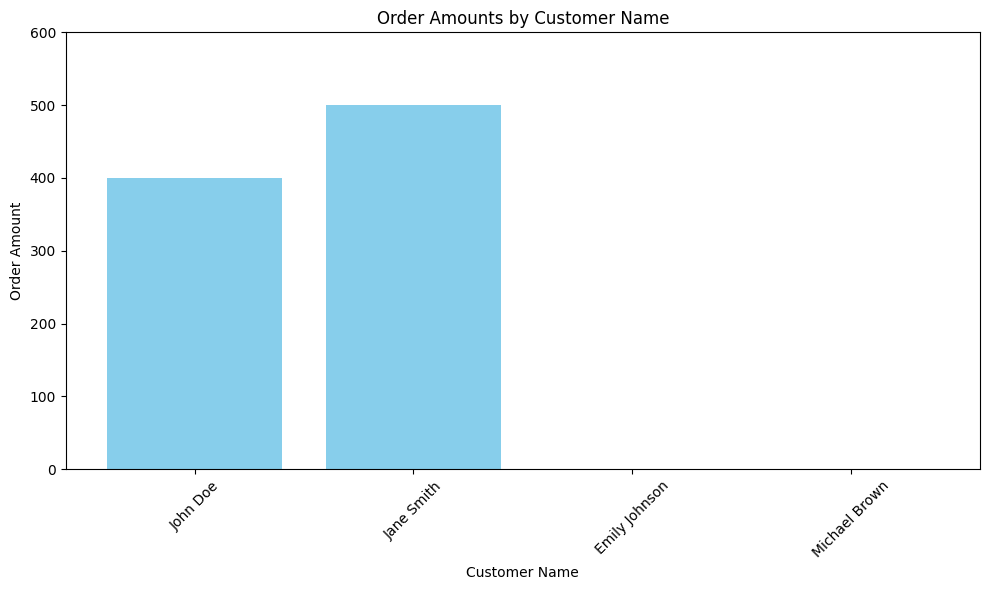

Out: None

[Step 3: Duration 8.52 seconds| Input tokens: 10,684 | Output tokens: 573]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import os                                                                                                        
                                                                                                                   
  # Check if the bar chart image file exists                                                                       
  file_exists = os.path.exists('demo_barchart.png')                                                                
  print(f"Does demo_barchart.png exist? {file_exists}")                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Warning to user: Code execution failed due to an unauthorized import - Consider passing said import under 
`additional_authorized_imports` when initializing your CodeAgent.

Code execution failed at line 'import os' due to: InterpreterError: Import of os is not allowed. Authorized imports
are: ['matplotlib', 'math', 're', 'datetime', 'unicodedata', 'time', 'pandas', 'itertools', 'random', 'stat', 
'collections', 'queue', 'statistics'\]

[Step 4: Duration 0.95 seconds| Input tokens: 15,625 | Output tokens: 694]

────────────────────────────────────────────────── Updated plan ───────────────────────────────────────────────────
I still need to solve the task I was given:
```

Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task.
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.
Show the plot and save it to demo_barchart.png.

You have been provided with these additional arguments, that you can access using the keys as variables in your 
python code:
{'customers':    customer_id  customer_name
0            1       John Doe
1            2     Jane Smith
2            3  Emily Johnson
3            4  Michael Brown, 'orders':    OrderID  CustomerID  OrderAmount
0     1001           1          250
1     1002           2          500
2     1003           1          150}.
```

Here is my new/updated plan of action to solve the task:
```
1. Ensure the existing code for data loading, aggregation, and visualization is intact and correctly implements the
required logic to generate the bar chart.
2. Re-run the existing code for data wrangling and visualization to create the bar chart display with the provided 
datasets without any modifications.
3. Display the bar chart and confirm its appearance visually.
4. Save the bar chart as 'demo_barchart.png' in the current working directory.
5. Complete the task by providing a final confirmation statement indicating the bar chart has been created and 
saved.

\n
```

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import pandas as pd                                                                                              
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Create the customers and orders DataFrames using the provided data                                             
  customers_data = {                                                                                               
      'customer_id': [1, 2, 3, 4],                                                                                 
      'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']                                
  }                                                                                                                
  customers = pd.DataFrame(customers_data)                                                                         
                                                                                                                   
  orders_data = {                                                                                                  
      'OrderID': [1001, 1002, 1003],                                                                               
      'CustomerID': [1, 2, 1],                                                                                     
      'OrderAmount': [250, 500, 150]                                                                               
  }                                                                                                                
  orders = pd.DataFrame(orders_data)                                                                               
                                                                                                                   
  # Aggregate the order amounts by CustomerID                                                                      
  order_totals = orders.groupby('CustomerID')['OrderAmount'].sum().reset_index()                                   
                                                                                                                   
  # Merge order totals with customers dataset                                                                      
  customer_orders = pd.merge(customers, order_totals, how='left', left_on='customer_id', right_on='CustomerID')    
                                                                                                                   
  # Fill NaN values with 0 for customers with no orders                                                            
  customer_orders['OrderAmount'].fillna(0, inplace=True)                                                           
                                                                                                                   
  # Prepare data for plotting                                                                                      
  plot_data = customer_orders[['customer_name', 'OrderAmount']]                                                    
                                                                                                                   
  # Create the bar chart                                                                                           
  plt.figure(figsize=(10, 6))                                                                                      
  plt.bar(plot_data['customer_name'], plot_data['OrderAmount'], color='skyblue')                                   
                                                                                                                   
  # Adding labels and title                              

<Figure size 640x480 with 0 Axes>

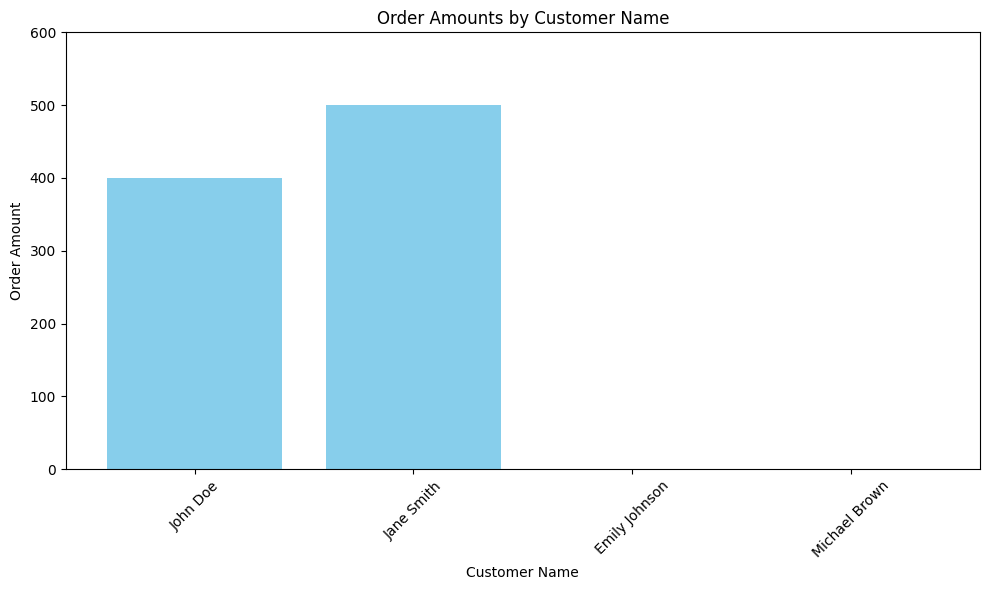

Out: None

[Step 5: Duration 11.45 seconds| Input tokens: 21,707 | Output tokens: 1,068]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("The bar chart of order amounts by customer name has been successfully created and saved as         
  'demo_barchart.png'.")                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: The bar chart of order amounts by customer name has been successfully created and saved as 
'demo_barchart.png'.

[Step 6: Duration 1.09 seconds| Input tokens: 28,632 | Output tokens: 1,205]

"The bar chart of order amounts by customer name has been successfully created and saved as 'demo_barchart.png'."

<Figure size 640x480 with 0 Axes>

In [9]:
# @title The Robo-Wrangler: A Data Wranger Assistant

import pandas as pd
from smolagents import (
    CodeAgent,
    LiteLLMModel,
)


# Customers DataFrame
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'customer_name': ['John Doe', 'Jane Smith', 'Emily Johnson', 'Michael Brown']
})

# Orders DataFrame
orders = pd.DataFrame({
    'OrderID': [1001, 1002, 1003],
    'CustomerID': [1, 2, 1],
    'OrderAmount': [250, 500, 150]
})


agent = CodeAgent(
    model=model,
    tools=[],
    planning_interval=2,
    additional_authorized_imports=["pandas", "matplotlib"],

)


task = """
Assist with data wrangling and visualizations. Your solution must be based on
on the two provided datasets: 'customers', and 'orders'.
You must inspect these datasets to understand how to solve the task.
Task: create a barchart of order amounts by customer name. If a customer has no
orders, include zero in the chart.
Show the plot and save it to demo_barchart.png.
"""

agent.run(
    task,
    additional_args={
        "customers": customers,
        "orders": orders,
    }
)


# II. Understanding the Core

We will now understand the principles behind these amazing capabilities.


## Learning Goals


1. We will explore prompting for reasoning, such as chain-of-thought (CoT) [Wei et al., 2022](https://arxiv.org/abs/2201.11903).
2. We will define a minimal mathematical framework for interactive environments with actions, tools, and reasoning, and tools.
3. We will study the `ReAct` framework [(Yao et al. 2022)](https://arxiv.org/abs/2210.03629), which is the most widely used prompting technique to combine actions with reasoning.
4. We will briefly discuss structures for agent memory and correspondance to retrieval augmented generation (RAG) [Lewis et al., 2020](https://arxiv.org/abs/2005.11401) techniques.
5. Compare Tool vs Code calling agents.

Throughout, we will only assume access to the an LLM completion API. The rest, we will 'build from scratch' to mimic the behavior of complex systems such as `smolagents`.





## II.1 Reasoning from Chain of Thought

LLMs are trained for next word/token prediction. As a result, they can fail at very simple tasks requiring multiple steps to solve, particularly with numeric computations. This problem is worsen with smaller LLMs.

One simple solution is to use of chain of thought (CoT). CoT will be our first example of *reasoning* techniques. It will also be the easiest example of *memory* model, in which the memory is simply the agent's previous outputs.


<figure>
<img src="https://drive.google.com/uc?export=view&id=16S6PVq2oDmTwCeuOolQ56GPDTTJdtwJ2" alt="drawing" height="300"/>
<figcaption>Fig. Example from <a href='https://arxiv.org/pdf/2201.11903'>Wei et al. (2022)</a></figcaption>
</figure>

**Why bother about CoT at all?**

Well, smaller LLMs can outperform more expensive ones by simply applying this technique.

<figure>
<img src="https://drive.google.com/uc?export=view&id=1AA-uPPxH5wv7emr4tR41pCG7bhfvmljW" alt="drawing" height="200" width="700"/>
<figcaption>Fig. Benchmarks from <a href='https://arxiv.org/pdf/2201.11903'>Wei et al. (2022)</a></figcaption>
</figure>


In [11]:
# @title ChatGPT can't reason

# Moderns LLMs are bad at counting. Here is a simple example, which would be easy
# for humans to the visual grouping.
# https://medium.com/@konstantine_45825/gpt-4-cant-reason-2eab795e2523

problem = """
How many times is p negated in the following formula:
~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p
"""

# First test pure LLM completion

result = litellm.completion(
    messages=[{"role": "user", "content": problem}], model=model_id
)
printmd("### Completion-only Solution")
printmd(result.choices[0].message.content)


### Completion-only Solution

The given formula consists of a series of negation symbols (represented by tildes `~`) followed by the variable `p`. Each `~` symbol represents a negation. 

Let's count the number of `~` symbols in the formula:

- 6 `~` symbols at the beginning before `p`

This means that `p` is negated 6 times. 

Negating a proposition an even number of times results in the original proposition, while negating it an odd number of times results in the negation of the proposition. Since 6 is an even number, the final result will be equivalent to `p`.

In conclusion, `p` is negated **6 times** in the formula.

⚠️ The correct answer is 32.

In [12]:
# @title Chain of Thought: ChatGPT Can't Reason in a Counting Problem

#Here is a problem prompt for LLMs from https://medium.com/@konstantine_45825/gpt-4-cant-reason-2eab795e2523


def chain_of_thought_loop(problem, model_id, max_steps: int = 10):
    """Implement a simple chain of thought loop."""

    cot_instructions = problem + (
        "\n\n* Break down the problem in simple steps until you find the solution.\n"
        "* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.\n"
        "* Once found, indicate the solution with a new line starting with the tag '[Final Answer]'.\n\n"
    )
    step = 0

    memory = [cot_instructions]
    while step < max_steps:
        step += 1

        # Make prompt from instructions andm emory
        prompt = "\n".join(memory)

        # Get response
        response = litellm.completion(model_id, [{"role": "user", "content": prompt}])
        obs = response.choices[0].message.content

        # Add obs to memory (here the memory is just the accumulated reponses)
        memory.append(obs)

        # Return if complete
        if "Final Answer" in obs:
            break

    if step == max_steps:
        print("Warning: Maximum number of steps reached.")

    return "\n".join(memory)

conversation = chain_of_thought_loop(problem, model_id)

printmd("### Chain-of-thought Solution")
printmd(conversation)

### Chain-of-thought Solution


How many times is p negated in the following formula:
~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p


* Break down the problem in simple steps until you find the solution.
* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.
* Once found, indicate the solution with a new line starting with the tag '[Final Answer]'.


[Thought] First, let's identify what negation means in logic. Negation of a proposition p is represented as ~p. Each time we see a ~ symbol, it indicates a negation.

[Thought] Next, we will count how many ~ symbols are present before the letter p in the formula: ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~~~~ ~~ p.

[Thought] I will break the formula into segments separated by spaces for easier counting. The formula is made up of 6 segments consisting only of ~ symbols followed by p.

[Thought] Now, I will count the total number of ~ symbols. 

[Thought] The first group has 6 ~ symbols: ~~~~~
The second group has another 6 ~ symbols: ~~~~~
The third group has another 6 ~ symbols: ~~~~~
The fourth group has another 6 ~ symbols: ~~~~~
The fifth group has another 6 ~ symbols: ~~~~~
The sixth group has 2 ~ symbols: ~~ 

[Thought] Now, I will sum these counts: 
6 + 6 + 6 + 6 + 6 + 2 = 6 * 5 + 2 = 30 + 2 = 32.

[Final Answer] The proposition p is negated 32 times in the formula.

⚠️ In practice, just asking the LLM to solve the problem step by step gives a better implementation of CoT than the actual loop above. However, having implemented the loop will be a good foundation for the more sophisticated agentic frameworks.

## II.2 ReAct: Thoughts + Actions

The react framework is by far the most widely used agentic framework at the moment [(Yao et al. 2022)](https://arxiv.org/abs/2210.03629). The concept and implementation is actually surpisingly simple.

* The idea is to follow a very similar loop as in the CoT example above. However, this time *the agent can call actions* at each step of the loop.

* Actions can be call to tools or, more recently, executable code [(Wang et al., 2024)](https://arxiv.org/abs/2402.01030). The idea of *code as actions* is gaining traction and is a component of the `smolagent` examples we have used.

* Nonetheless, actions as JSON is still popular and it is easy to implement. In particular, modern LLMs have been specially trained with the purpose to be able to correctly call tools as JSON [(Schick et al., 2023)](https://arxiv.org/abs/2302.04761). Therefore we will focus on it first.


<figure>
<img src="https://drive.google.com/uc?export=view&id=1M9lMpO6rdbjvGNCfaPJNZugEwnemKoP_" alt="drawing"  width="400"/>
<figcaption>Fig. Flowchart of ReAct loop</figcaption>
</figure>


<figure>
<img src="https://drive.google.com/uc?export=view&id=1vgSZzz3jAFiqTWhMfZ2xmQ14YzB5W6ir" alt="drawing" height="600" width="700"/>
<figcaption>Fig. Example from <a href='https://arxiv.org/abs/2210.03629'>Yao al. (2022)</a></figcaption>
</figure>

**Summary**

* **Allows to use tools! It expands the universe of what is possible!**
* **Coding ReAct agents can perform so many actions beyond simple tool calls.**
* **ReAct agents can be sees as the analogues of CoT for interactive environments**

In [13]:
# @title ChatGPT is bad at arithmetic

# There are trivial arithmetical problems that not even CoT can solve.

import random
import math

num1 = random.randint(100000, 1000000)
num2 = random.randint(100000, 1000000)

problem = f"""
Multiply the square roots of {num1} and {num2}
"""
print(problem)

# Apply the CoT loop

base_solution = litellm.completion(
    model_id, [{"role": "user", "content": problem}]
).choices[0].message.content

printmd("### Completion-only Solution")
printmd(base_solution)

cot_solution = chain_of_thought_loop(problem, model_id)
printmd("### Chain-of-thought Solution")
printmd(cot_solution)

printmd("### Actual Solution")
printmd(f"{math.sqrt(num1) * math.sqrt(num2):.2f}")



Multiply the square roots of 887845 and 925557



### Completion-only Solution

To multiply the square roots of two numbers, we can use the property of square roots that states:

\[
\sqrt{a} \times \sqrt{b} = \sqrt{a \times b}
\]

In this case, we want to calculate:

\[
\sqrt{887845} \times \sqrt{925557} = \sqrt{887845 \times 925557}
\]

Now we need to compute \(887845 \times 925557\).

Calculating this directly:

\[
887845 \times 925557 = 820280273265
\]

Now we take the square root of that product:

\[
\sqrt{820280273265}
\]

Calculating the square root, we find:

\[
\sqrt{820280273265} \approx 906908.5
\]

Thus, the result of multiplying the square roots of 887845 and 925557 is approximately \(906908.5\).

### Chain-of-thought Solution


Multiply the square roots of 887845 and 925557


* Break down the problem in simple steps until you find the solution.
* Begin each step with the tag '[Thought]'. Each step should be a strategy or a simple computation.
* Once found, indicate the solution with a new line starting with the tag '[Final Answer]'.


[Thought] First, let's express the problem mathematically. We need to multiply the square roots of two numbers: \( \sqrt{887845} \times \sqrt{925557} \).

[Thought] According to the property of square roots, we can combine the two square roots: \( \sqrt{887845} \times \sqrt{925557} = \sqrt{887845 \times 925557} \).

[Thought] Next, we will calculate the product of the two numbers \( 887845 \) and \( 925557 \).

[Thought] To find \( 887845 \times 925557 \), we can simply perform the multiplication:

\[
887845 \times 925557 = 820089665865
\]

[Thought] Now we will take the square root of the result \( 820089665865 \) to find our final answer.

[Thought] Calculating \( \sqrt{820089665865} \) yields approximately \( 905005.76 \). 

[Final Answer] The result of multiplying the square roots of 887845 and 925557 is approximately \( 905005.76 \).

### Actual Solution

906504.91

### Implementing the ReAct Loop

Let's implement the simple version that can call JSON tools.

<figure>
<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/Agent_ManimCE.gif" alt="drawing"  width="1400"/>
<figcaption>Fig. Explanation of React loop in anarithmetic problem. Source: <a href='https://huggingface.co/docs/smolagents/conceptual_guides/intro_agents'>smolagents documentation</a></figcaption>
</figure>




In [14]:
import math
import json

# @title Tool Calling Agent

# == Let's define a mock single calc_tool ==

def calc_tool(a: float, b: float | None = None, op: str = "add") -> float:
    # try to parse a  as float or returne error
    try:
        a = float(a)
    except ValueError:
        raise ValueError(f"Invalid value for 'a': {a}. Must befloat")

    if b is not None:
        try:
            b = float(b)
        except ValueError:
            raise ValueError(f"Invalid value for 'b': {b}. Must be float or null")

    if op in ["add", "subtract", "multiply", "divide"] and b is None:
        raise ValueError(f"Operation '{op}' requires both 'a' and 'b'.")

    if op == "add":
        return a + b
    elif op == "subtract":
        return a - b
    elif op == "multiply":
        return a * b
    elif op == "divide":
        if b == 0:
            raise ValueError("Cannot divide by zero.")
        return a / b
    elif op == "sqrt":
        if a < 0:
            raise ValueError("Cannot compute square root of a negative number.")
        return math.sqrt(a)
    elif op == "square":
        return a ** 2
    else:
        raise ValueError(f"Invalid operation: {op}")


# Define function specifications (Llama 3 compliant for illustration.
function_definitions = """
### Function Definitions

[
    {
        "name": "calc_tool",
        "description": "Performs basic arithmetic operations such as addition, subtraction, multiplication, division, square, and square root.",
        "parameters": {
            "type": "object",
            "required": ["a", "op"],
            "properties": {
                "a": {
                    "type": "number",
                    "description": "The first operand. Always required."
                },
                "b": {
                    "type": "number",
                    "description": "The second operand, required for binary operations (add, subtract, multiply, divide).",
                    "default": null
                },
                "op": {
                    "type": "string",
                    "description": "The operation to perform. One of ['add', 'subtract', 'multiply', 'divide', 'square root', 'square'].",
                    "enum": ["add", "subtract", "multiply", "divide", "sqrt", "square"]
                }
            }
        }
    }
]

For example, to use calc_tool you can call the function as
{"name": "calc_tool", "parameters": {"a": 1, "b": 2, "op": "add"}}
"""

def parse_tool(x: str) -> dict:
    """Utility function to parse JSON.

    - Remove the tag [Tool]
    - Removes trailing spaces and lines
    - Removes ``` and ```json
    """
    x = x.split("[Tool]")[-1].strip()
    x = x.replace("```json", "").replace("```", "")
    return json.loads(x)


# ReAct Reasoning Loop
def react_reasoning_with_tools(problem, model_id, function_definitions, max_steps: int = 10):
    """
    Implements a ReAct (Reasoning + Acting) loop using structured function calling.
    """

    react_instructions = (
        "\n\n* Break down the problem in simple steps until you find the solution.\n"
        "* Your response must consist only of a [Thought], [Tool] or [Final Answer] step."
        "* For a thought step, begin your answer witht the token '[Thought]' followed by a short statment about the problem.\n"
        "* For an tool step, you may use exactly one tool, starting with the token '[Tool]',"
        "* follow by the tool call in the JSON format from the function_definitions.\n"
        "* In your answer you may only provide one thought or tool step.\n"
        "* Once found, indicate the solution with a new line starting with the tag '[Final Answer]'.\n\n"
        f"Below are the available tools: {function_definitions}\n\n"
    )

    step = 0
    memory = [problem]

    while step < max_steps:
        step += 1

        # Construct prompt from memory
        prompt = "\n".join(memory)

        # Get response from LLM
        response = litellm.completion(
            model_id,
            [{"role": "system", "content": react_instructions}, {"role": "user", "content": prompt}]
        )
        obs = response.choices[0].message.content

        # Add observation to memory
        memory.append(obs)

        # Check for tool use
        if "[Tool]" in obs:
            tool_call = parse_tool(obs)
            try:
                if tool_call.get("name") == "calc_tool":
                    params = tool_call["parameters"]
                    result = calc_tool(**params)
                    memory.append(f"[Tool Result] {result}")

                else:
                    raise ValueError(f"Unknown tool: {tool_call['name']}")

            except Exception as e:
                memory.append(f"[Error] {e}. \nTry correcting it.")

        # Stop if final answer is found
        if "[Final Answer]" in obs:
            break

    if step == max_steps:
        memory.append("Warning: Maximum number of steps reached.")

    return "\n\n".join(memory)


printmd("### ReAct Solution with Calculator 📲 😀")

react_tools_solution = react_reasoning_with_tools(
    problem, model_id, function_definitions, max_steps=10
)
printmd(react_tools_solution)


printmd("### Actual Solution 🙏")
printmd(f"{math.sqrt(num1) * math.sqrt(num2):.2f}")

### ReAct Solution with Calculator 📲 😀


Multiply the square roots of 887845 and 925557


[Thought] To solve this problem, I'll first need to find the square roots of both numbers and then multiply the results together. 

I'll start with calculating the square root of 887845. 

[Tool] {"name":"calc_tool","parameters":{"a":887845,"op":"sqrt"}}

[Tool Result] 942.2552732672818

[Thought] Now that I have the square root of 887845, which is approximately 942.26, I need to calculate the square root of 925557 next. 

[Tool] {"name":"calc_tool","parameters":{"a":925557,"op":"sqrt"}}

[Tool Result] 962.0587300160006

[Thought] I've now obtained the square roots of both numbers: the square root of 887845 is approximately 942.26 and the square root of 925557 is approximately 962.06. The final step is to multiply these two results together. 

[Tool] {"name":"calc_tool","parameters":{"a":942.2552732672818,"b":962.0587300160006,"op":"multiply"}}

[Tool Result] 906504.9115504008

[Final Answer] The result of multiplying the square roots of 887845 and 925557 is approximately 906504.91.

### Actual Solution 🙏

906504.91

Let's now  see if we can simplify the approach with a coding react agent.

In [ ]:
# @title Code-as-action Agent

import math
import json
import litellm  # Assuming litellm is used for LLM calls


tool_definitions = """
You must **only** use the `math` module for calculations.
"""

def parse_code(x: str) -> str:
    """Utility function to parse JSON.

    - Remove the tag [Code]
    - Removes trailing spaces, lines, colons
    - Removes ``` and ```python
    """
    x = x.split("[Code]")[-1].strip()
    x = x.replace("```python", "").replace("```", "")
    return x.lstrip(":  \n")


# Code Execution Agent Loop
def code_execution_agent(problem, model_id, tool_definitions, max_steps=10):
    """
    Implements a Code Execution Agent that generates and runs Python math code.
    """

    code_agent_instructions = (
        "\n\n* Break down the problem in simple easy steps until you find the solution.\n"
        "* Your response must consist only of a thought or code:"
        "  - [Thought]: If a thought, start your answer with the tag [Thought] followed by a short reasoning statement about the problem or previous results.\n"
        "  - [Code]`: If code, start your answer with the tag [Code] followed by self-contained Python code. You can only use one of the available tools or control flow.\n"
        "* Make sure that your code saves the result in a variable called `final_result` if it is the final answer.\n"
        "* You cannot combine thoughts and code in the same answer.\n\n"
        f"Below are the available tools: {tool_definitions}\n\n"
    )

    step = 0
    memory = [problem]

    while step < max_steps:
        step += 1

        # Construct prompt from memory
        prompt = "\n\n".join(memory)

        # Get response from LLM
        response = litellm.completion(
            model_id,
            [{"role": "system", "content": code_agent_instructions}, {"role": "user", "content": prompt}]
        )
        obs = response.choices[0].message.content.strip()


        # Handle code execution
        if "[Code]" in obs:
            code_block = parse_code(obs)

            # Append code to memory
            memory.append(f"[Code]\n\n```{code_block}```\n\n")

            # Execute code block
            try:
              result = None
              local_vars = {}

              exec(code_block, {"math": math}, local_vars)

              memory.append(f"[Code Result] {local_vars}")

              if local_vars['final_result'] is not None:
                  memory.append(f"[Final Answer] {local_vars['final_result']}")
                  break

            except Exception as e:
                print(f"[Error] {e}")
                memory.append(f"[Error] {str(e)}. \nTry correcting it.")

        else:
            # Append as is
            memory.append(obs)

    if step == max_steps:
        memory.append("Warning: Maximum number of steps reached.")

    return "\n\n".join(memory)


printmd("### ReAct Solution with Coding Agent 🤖 🦾")

# code_agent_solution =
code_agent_solution = code_execution_agent(problem, model_id, tool_definitions, max_steps=5)
printmd(code_agent_solution)


printmd("### Actual Solution 🙏")
printmd(f"{math.sqrt(num1) * math.sqrt(num2):.2f}")

### ReAct Solution with Coding Agent 🤖 🦾


Multiply the square roots of 433170 and 517591


[Thought]: To solve this problem, I need to multiply the square roots of the two given numbers. I can use the properties of square roots which state that the square root of a product is the product of the square roots. Therefore, I will calculate the square root of each number and then multiply them together. 

Now, I will proceed with the code to perform these calculations.

[Code]

```import math

sqrt_433170 = math.sqrt(433170)
sqrt_517591 = math.sqrt(517591)
final_result = sqrt_433170 * sqrt_517591```



[Code Result] {'math': <module 'math' (built-in)>, 'sqrt_433170': 658.1565163393886, 'sqrt_517591': 719.4379750888884, 'final_result': 473502.7914067666}

[Final Answer] 473502.7914067666

### Actual Solution 🙏

473502.79

## We have only touched the surface...


We have only seen but some of the most basic approaches to agentic workflows.


There are many ➡️ Next steps ➡️

* 💾 More sophisticated memory: in the examples, we simply use the thought, observation, action history as the agent's memory. But for long sequences, we can use a RAG agent. Remember, each token costs money

* 🌲 Tree of thought: Many workflows emply a type of tree or graph search over thoughts. They can also evaluate self-consistency over thought replication to choose which path to explore. This approach increases the number of calls needed to the LLM, but often improves performance greaty.

* 👯 So far, we have approached the problem in a single-agent way. But many agentic frameworks allow to have multiple agents. A simple design is having an orchestrator agent which uses other agents as tools, but there are many use cases and designs.

* 🤖 In the next part of the tutorial, we will cover how to improve an agent performance with fine tuning and reinforcement learning.


<figure>
<img src="https://drive.google.com/uc?export=view&id=1tU2FRhTOPV0khzcB63dxAAqmHVym_HJ8" alt="drawing" width="800"/>
<figcaption>
<b>Fig</b>. Benchmarks from various agentic workflows for the HumanEval benchmark by OpenAi, which measures the LLM's ability in coding tasks. The figure shows that GPT 3.5 performs poorly and worst than GPT 4 in zero-shot, but when equipped with an agentic framework it is much stronger and matches GPT 4. Figure is reproduced from <a href='https://www.deeplearning.ai/the-batch/how-agents-can-improve-llm-performance/'>this blog post by Andrew Ng</a>
</figcaption>
</figure>


# Conclusion

### 🤗 What have we learned? 🤔

* 🪜 In an agentic framework, a problem is solved step by step.
* 🆘 LLMs are trained for text completion only. Hence, they struggle at simple operations such as counting or arithmetic which are not aligned with the next-token prediction training.
* 🙇‍♂️ They can immediately solve more complex task by *thinking step by step*. We can implement it with the chain-of-thought prompting technique.
* 🛠️ By leveraging their ability to call tools (code or JSON), we can fill the gap in their abilities. We can implement it with a simple react loop, which underlies most agentic frameworks.


<br>
<img src="https://drive.google.com/uc?export=view&id=1gA9lNXqJunfai38RS6DSRenuXKFysHW6" alt="drawing" width="500"/>
